# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>

### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">As respostas devem ser dadas no Moodle, o notebook deve ser usado para executar código para obtenção dos resultados.</span>

---

In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Questão 1)

São exemplos típicos de dados não estruturados do tipo sequencial:

(a) a coluna idade de uma tabela de um banco de dados, ordenada de forma ascendente<br>
(b) os valores de uma tabela de base de dados relacional de fornecedores<br>
(c) quantidade de engajamentos em posts de um determinado perfil coletados diariamente<br>
(d) uma imagem de satélite capturada em determinado dia e hora<br>

In [ ]:
#c

### Questão 2)

São exemplos típicos de dados não estruturados espaciais:

(a) áudio capturado de uma sala de reuniões<br>
(b) valores de umidade relativa do ar obtidos armazenados a cada hora<br>
(c) mapa de calor formado por temperaturas coletadas em 20 cidades de uma determinada região<br>
(d) a quantidade atual de acessos à diversas seções de uma página web<br>

In [ ]:
#c

### Questão 3)
 
Considere as seguintes afirmações sobre o método Bag-of-features:

I - sua etapa mais relevante é a classificação de vetores de características em classes pré-definidas<br>
II - quanto maior o tamanho do dicionário, melhor a representação resultante<br>
III - é equivalente ao método PCA para o caso de extração de características em dados não estruturados<br>
IV - é exclusivo para bases de dados de sinais e imagens<br>
V - pode-se utilizar qualquer característica como base para sua aplicação<br>
VI - sua maior vantagem é a flexibilidade no uso de diferentes etapas, e sua maior desvantagem é a necessidade de escolher bem cada uma dessas etapas consumindo tempo e recursos computacionais.<br>


São verdadeiras as afirmações:

(a) I, V e VI<br>
(b) V e VI<br>
(c) II e V<br>
(d) III, IV e VI<br>

In [ ]:
#b

### Questão 4)

Carregue os dados do arquivo `pollution_nd.csv` utilizando o comando `pd.read_csv()`

Esse dataframe possui 4 linhas (0, 1, 2, 3) relativas à medição de dióxido de nitrogénio em 4 localizações. Foram feitas medições durante 5 dias a cada 5 minutos em diferentes posições de uma cidade, sendo que o primeiro deles (na primeira linha, posição 0) é sabido ter sido capturado em um bairro próximo à rodovia.

Queremos identificar qual das localizações desconhecidas (1, 2, 3) mais se assemelha a primeira (0). Para isso, extraia um vetor de características (para cada sinal) composto de:
* Entropia da energia (com 24 blocos)
* Entropia espectral (com 24 blocos)
* Centróide espectral (considere frequência = 0.2Hz)
* Dispersão espectral (considere frequência = 0.2Hz)

Compute a distância Euclidiana entre eles e identifique a linha mais próxima de 0. Nessa mais próxima (1, 2 ou 3) verifique qual característica (individualmente) dentre as computadas apresentou a menor distância com relação ao sinal 0, marcando a alternativa correta.

(a) Mais próxima: 3; característica mais próxima: Entropia da energia<br>
(b) Mais próxima: 2; característica mais próxima: Dispersão espectral<br>
(c) Mais próxima: 2; característica mais próxima: Entropia espectral<br>
(d) Mais próxima: 3; característica mais próxima: Centróide espectral<br>
(e) Mais próxima: 1; característica mais próxima: Dispersão espectral<br>

In [3]:
def entropia_energia(sinal, n_blocos=24):
    '''Entropia da energia do sinal'''
    # energia total 
    energia_sinal = np.sum(sinal ** 2)
    M = len(sinal)
    
    # calcula janelas dentro do sinal
    M_janelas = int(np.floor(M / n_blocos))
    # verifica se tamanho dos blocos 
    # é multiplo do tamanho do sinal
    if M != M_janelas * n_blocos:
        sinal = sinal[0:M_janelas * n_blocos]

    # monta matriz [M_janelas x n_blocos]
    janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy()
    
    # Computa energias de cada janela (normalizada pela do sinal)
    e_janelas = np.sum(janelas ** 2, axis=0) / (energia_sinal + 0.0001)
    #print(e_janelas)

    # Computa entropia entre energias das janelas
    entropia = -np.sum(e_janelas * np.log2(e_janelas + 0.0001))
    return entropia

def entropia_espectral(sinal, n_blocos=24):
    """Computes the spectral entropy"""
    
    fft_abs = np.abs(np.fft.fft(sinal))
    
    entropia_esp = entropia_energia(fft_abs, n_blocos=n_blocos)

    return entropia_esp

def centroide_dispersao_espectral(sinal, tx_amostragem = 0.2):
    '''Calcula o centro de massa e dispersão do espectro do sinal'''
    
    fft_abs = np.abs( np.fft.fft(sinal) )
    N = len(fft_abs)
    
    # indices de frequencia
    ind = (np.arange(1, N+1)) * (tx_amostragem / (2.0*N))

    # calcula a distribuicao do espectro normalizando para soma unitária
    Xt = fft_abs.copy()
    Xt = Xt / Xt.max()
    NUM = np.sum(ind * Xt)
    DEN = np.sum(Xt) + 0.0001 

    # Centroide:
    centroide = (NUM / DEN)

    # Dispersão:
    dispersao = np.sqrt(np.sum(((ind - centroide) ** 2) * Xt) / DEN)

    # Normalizando:
    centroide = centroide / (tx_amostragem / 2.0)
    dispersao = dispersao / (tx_amostragem / 2.0)

    return centroide, dispersao

In [13]:
signals = np.genfromtxt('./dados/pollution_nd.csv', delimiter=',').astype(np.float32)
features = []
for i in range(signals.shape[0]):
    energia = entropia_energia(signals[i])
    entropia = entropia_espectral(signals[i])
    centroid, dispersao = centroide_dispersao_espectral(signals[i])
    features.append([energia, entropia, centroid,dispersao])

distances = []
for i in range(signals.shape[0]):
    diq = 0
    for j in range(4):
        diq += (features[i][j]-features[0][j])**2
    distances.append(np.sqrt(diq))
print(features[0])
print(features[2])
print('--'*20)
print(distances)

print("2 and dispercao spectral")

[3.8800056, 0.2276145051648487, 0.4131110599390647, 0.44135843143991]
[4.0074077, 0.17278959416628076, 0.38582635958655553, 0.4379977473912833]
----------------------------------------
[0.0, 0.5550464511084408, 0.1413959216507763, 0.532938559568173, 0.31065167951107897]
2 and dispercao spectral


### Questão 5)

Carrege as imagens da base de dados `lfw_subset` contida na biblioteca `skimage`, conforme código abaixo. Considere apenas as 100 primeiras imagens dessa base de dados (referente a faces).

Vamos utilizar o método LBP (com implementação conforme visto nos exercícios e replicada abaixo) e a distância L1 para comparar faces dessa base de dados.

Utilizando como imagem de consulta a imagem de índice 94 (posição 95) da lista, e os seguintes parâmetros para o LBP:
* points = 18
* radius = 2
* n_bins = 32

Retorne as 5 imagens mais similares (excluindo a de consulta). Quais são os índices dessas imagens?

(a) 18, 90, 53, 46, 41<br>
(b) 75, 39, 86, 85, 68<br>
(c) 75, 39, 41, 47, 94<br>
(d) 18, 75, 90, 93, 39<br>

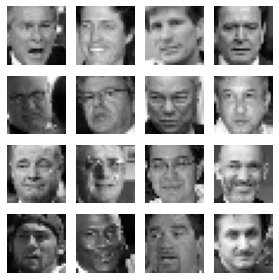

In [14]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import feature
from skimage import data
fig, axes = plt.subplots(4, 4, figsize=(4, 4))
ax = axes.ravel()
imgs = data.lfw_subset()
for i in range(16):
    ax[i].imshow(imgs[i], cmap=plt.cm.gray)
    ax[i].axis('off')
fig.tight_layout()

In [15]:
def lbp_features(img, points=8, radius=1, n_bins=10):
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11

    # normaliza cada imagem para que o máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)

    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

In [39]:
pts = 18
rad = 2
nbi = 32
features = lbp_features(imgs[0], pts, rad, nbi)
features = features
for i in range(1, 100):
    features = np.vstack([features, lbp_features(imgs[i], pts, rad, nbi)])

dist = np.zeros(features.shape[0])
for i in range(features.shape[0]):
    dist[i] = np.sum(np.abs(features[94]-features[i]))
print(features.shape)
farthest_index = np.argsort(dist)[-5:]
closet_index = np.argsort(dist)[:6]
print(farthest_index)
print(closet_index)
print(dist[54])
print(dist[18])

(100, 32)
[10 79  6 61 54]
[94 18 75 90 93 39]
0.45119999927807997
0.12479999980031999
